# Projects 1

Sally Yang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import gravis as gv
from collections import defaultdict

# *LU Factorization*

In [2]:
# LU Factorization Part 1. PLU Factorization Program 

def PLU_factorization(A):
    n = len(A)
    L = np.eye(n)  # Initialize L as identity matrix
    U = np.copy(A)  # To derive U from A, begin with partial pivoting then Gaussian elimination...
    indx = np.arange(1, n + 1)  # Initialize indx array with 1, 2, ..., n 
    
    for k in range(n - 1): 
        # Partial pivoting
        max_index = np.argmax(np.abs(U[k:, k])) + k # Search for the largest entry in the kth column
        
        if max_index != k: # Check if the (k,k)th entry is the largest entry or not
            # If the (k,k)th entry is the largest entry in the column, can just select it as pivot
            # If not, then exchange the kth row with the row with kth row's largest entry in both U and L
            # So that the new (k,k)th entry, which is the largest in the column, is a more proper pivot 
            U[[k, max_index]] = U[[max_index, k]]
            L[[k, max_index], :k] = L[[max_index, k], :k]
            
            # Update indx array to reflect the row exchange 
            indx[k], indx[max_index] = indx[max_index], indx[k] 
        
        for i in range(k + 1, n):
            # Compute multipliers and perform Gaussian elimination
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
            
    P = np.eye(n)[indx - 1] # Derive permutation matrix P from indx array
    return L, U, indx, P

# Testing this program module with random nonsingular matrix 
A = np.array([[2, 1, -1],
              [2, 3, 3],
              [4, 1, -3]], dtype=float)

L, U, indx, P = PLU_factorization(A)

print("Lower triangular matrix L:")
print(L)
print("\nUpper triangular matrix U:")
print(U)
print("\nPermuted index array indx:")
print(indx)
print("\nPermutatation matrix P: ")
print(P)

Lower triangular matrix L:
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [0.5 0.2 1. ]]

Upper triangular matrix U:
[[ 4.   1.  -3. ]
 [ 0.   2.5  4.5]
 [ 0.   0.  -0.4]]

Permuted index array indx:
[3 2 1]

Permutatation matrix P: 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

In [3]:
# LU Factorization Part 2. Linear Systems Solver 

def solve_linear_system(A, b):
    n = A.shape[0]
    
    # First perform PLU factorization 
    L, U, indx, P = PLU_factorization(A)
    
    # Permute vector b using P 
    b_permuted = P.dot(b)
    
    # Solve Ly = Pb for y using forward substitution
    y = np.zeros(n)
    for i in range(n):
        y[i] = b_permuted[i] - L[i, :i].dot(y[:i])
    
    # Solve Ux = y for x using backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - U[i, i+1:].dot(x[i+1:])) / U[i, i]
    return x

# Testing 
A = np.array([[2, 1, -1],
              [2, 3, 3],
              [4, 1, -3]], dtype=float)
b = np.array([1, 2, 3])
x = solve_linear_system(A, b)

print("Solution to the linear system Ax = b:")
print(x)

Solution to the linear system Ax = b:
[ 2.5 -2.5  1.5]

In [4]:
# LU Factorization Part 3. Matrix Inverse Solver

def matrix_inverse(A): 
    n = A.shape[0] 
    
    # Initialize the matrix inverse as empty to update with x_i's later 
    A_inv = np.zeros_like(A, dtype=float)
    
    # Perform PLU factorization
    L, U, indx, P = PLU_factorization(A)
    
    # Solve Ax_i = e_i for i =1, 2, ..., n just as described in the project description
    for i in range(n):
        e_i = np.eye(n)[:, i]  # e_i is the ith column of n by n identity matrix
        
        # Permute e_i according to the permutation matrix P
        e_i_permuted = P.dot(e_i)
        
        # Solve linear system Ax_i = e_i for x_i
        y = np.zeros(n)
        for j in range(n):
            y[j] = e_i_permuted[j] - L[j, :j].dot(y[:j])
        
        x_i = np.zeros(n)
        for j in range(n - 1, -1, -1):
            x_i[j] = (y[j] - U[j, j+1:].dot(x_i[j+1:])) / U[j, j]
        
        # Store x_i as the ith column vector (from left to right) of the matrix inverse
        A_inv[:, i] = x_i 
    
    return A_inv # Now the matrix inverse is updated with x_i's obtained from the linear systems solver

# Testing 
A = np.array([[2, 1, -1],
              [2, 3, 3],
              [4, 1, -3]], dtype=float)
A_inv = matrix_inverse(A)

print("Inverse of matrix A:")
print(A_inv)

# Or (easier in practice, when n is small)
A = np.array([[2, 1, -1],
              [2, 3, 3],
              [4, 1, -3]], dtype=float)
x_1 = solve_linear_system(A, np.array([1, 0, 0]))
x_2 = solve_linear_system(A, np.array([0, 1, 0]))
x_3 = solve_linear_system(A, np.array([0, 0, 1]))
print("This way we get A's inverse as follows (which yields the same results): ")
print(np.column_stack((x_1, x_2, x_3)))

Inverse of matrix A:
[[-3.   0.5  1.5]
 [ 4.5 -0.5 -2. ]
 [-2.5  0.5  1. ]]
This way we get A's inverse as follows (which yields the same results): 
[[-3.   0.5  1.5]
 [ 4.5 -0.5 -2. ]
 [-2.5  0.5  1. ]]

This is nice clean code, well documented and easy to follow.

I would like to see you explain what you are doing in Markdown, outside
of the code (for this and all of the projects); you can introduce the
problem, put in any formulas you need, describe what is happening
mathematically, etc.

For this project, I’d like to see you test your algorithms on a few more
matrices. Can you add an automated way to test if they do what they say
they do? Can you test if the U matrix is truly upper triangular, if the
L matrix is truly lower triangular, if the product of L and U is equal
to the original matrix, etc.? What about for the inverse and the linear
equation solvers – can you test if they are indeed giving correct
answers?

Grade: R

# *Markov Chains*

In [5]:
# Markov Chains Part 1. Transition Matrix and Market Share Predicts

P = np.array([[0.5, 0.2, 0.3],
              [0.2, 0.6, 0.1],
              [0.3, 0.2, 0.6]])

# Check if P is correctly modeled so that this is indeed a markov chain
if sum(P[0])+sum(P[1])+sum(P[2]) != 3:
    print("transition matrix not right")
else: print("transition matrix correctly modeled")

# Initial state vector 
x_0 = np.array([1/3, 1/3, 1/3])

# Use the transition matrix to calculate market shares after three years
final_market_shares = np.linalg.matrix_power(P, 3) @ x_0
print("Market shares three years from now is:")
print(final_market_shares)

# Test for different initial state vectors to see if there's a difference
final_market_shares_A_dominant = np.linalg.matrix_power(P, 3) @ np.array([2/3, 1/6, 1/6])
print("Had the initial state been (2/3, 1/6, 1/6), market shares three years from now would be:")
print(final_market_shares_A_dominant)

final_market_shares_B_dominant = np.linalg.matrix_power(P, 3) @ np.array([1/6, 2/3, 1/6])
print("Had the initial state been (1/6, 2/3, 1/6), market shares three years from now would be:")
print(final_market_shares_B_dominant)

final_market_shares_C_dominant = np.linalg.matrix_power(P, 3) @ np.array([1/6, 1/6, 2/3])
print("Had the initial state been (1/6, 1/6, 2/3), market shares three years from now would be:")
print(final_market_shares_C_dominant)

transition matrix correctly modeled
Market shares three years from now is:
[0.339      0.27533333 0.38566667]
Had the initial state been (2/3, 1/6, 1/6), market shares three years from now would be:
[0.345      0.26916667 0.38583333]
Had the initial state been (1/6, 2/3, 1/6), market shares three years from now would be:
[0.3265     0.30666667 0.36683333]
Had the initial state been (1/6, 1/6, 2/3), market shares three years from now would be:
[0.3455     0.25016667 0.40433333]

In [6]:
# Markov Chains Part 2. Advertising Campaigns

# To analyze the effect of each advertising plan on company A's market shares
# Modify the transition matrix accordingly 
# Switching an additional 20% of company B's remaining customers to A means
# the transition probability from B to A becomes 0.2 + 0.2*0.6 = 0.32
# the transition probability from B to B becomes 0.6*(1-0.2) = 0.48
# Switching an additional 20% of company C's remaining customers to A means
# the transition probability from C to A becomes 0.3 + 0.2*0.6 = 0.42
# the transition probability from C to C becomes 0.6*(1-0.2) = 0.48

P1 = np.array([[0.5, 0.32, 0.3],
              [0.2, 0.48, 0.1],
              [0.3, 0.2, 0.6]])

P2 = np.array([[0.5, 0.2, 0.42],
              [0.2, 0.6, 0.1],
              [0.3, 0.2, 0.48]])

# Now we predict market shares 3 years from now using different initial conditions
x_0_equal_share = np.array([1/3, 1/3, 1/3])
x_0_A_dominant = np.array([2/3, 1/6, 1/6])
x_0_B_dominant = np.array([1/6, 2/3, 1/6])
x_0_C_dominant = np.array([1/6, 1/6, 2/3])

# Use the transition matrices to calculate market shares after 3 years under plan 1
final_market_shares_1_equal_share = np.linalg.matrix_power(P1, 3) @ x_0_equal_share
print("Advertising plan 1 with equal-share initial condition, market shares 3 years from now is:")
print(final_market_shares_1_equal_share)

final_market_shares_1_A_dominant = np.linalg.matrix_power(P1, 3) @ x_0_A_dominant
print("Advertising plan 1 with the A-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_1_A_dominant)

final_market_shares_1_B_dominant = np.linalg.matrix_power(P1, 3) @ x_0_B_dominant
print("Advertising plan 1 with the B-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_1_B_dominant)

final_market_shares_1_C_dominant = np.linalg.matrix_power(P1, 3) @ x_0_C_dominant
print("Advertising plan 1, under the C-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_1_C_dominant)

# If we compare these predicted results with those from part 1, 
# We may infer that the market share of company A is likely to be improved by plan 1
# Because under all four initial state vectors we chose, 
# Company A's market share after 3 years is higher than that in the case of no advertising plan
# We can see this if we compare the first entries in the final_share vectors

# However, under different initial conditions, size of increase is different
increase_equal_share = final_market_shares_1_equal_share[0] - final_market_shares[0]
print("The increase in A's market share resulted from plan 1 under equal-share condition is:")
print(increase_equal_share)
increase_A_dominant = final_market_shares_1_A_dominant[0] - final_market_shares_A_dominant[0]
print("The increase in A's market share resulted from plan 1 under A-dominant condition is:")
print(increase_A_dominant)
increase_B_dominant = final_market_shares_1_B_dominant[0] - final_market_shares_B_dominant[0]
print("The increase in A's market share resulted from plan 1 under B-dominant condition is:")
print(increase_B_dominant)
increase_C_dominant = final_market_shares_1_C_dominant[0] - final_market_shares_C_dominant[0]
print("The increase in A's market share resulted from plan 1 under C-dominant condition is:")
print(increase_C_dominant)


# Use the transition matrices to calculate market shares after 3 years under plan 2
final_market_shares_2_equal_share = np.linalg.matrix_power(P2, 3) @ x_0_equal_share
print("Advertising plan 2 with equal-share initial condition, market shares 3 years from now is:")
print(final_market_shares_2_equal_share)

final_market_shares_2_A_dominant = np.linalg.matrix_power(P2, 3) @ x_0_A_dominant
print("Advertising plan 2 with the A-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_2_A_dominant)

final_market_shares_2_B_dominant = np.linalg.matrix_power(P2, 3) @ x_0_B_dominant
print("Advertising plan 2 with the B-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_2_B_dominant)

final_market_shares_2_C_dominant = np.linalg.matrix_power(P2, 3) @ x_0_C_dominant
print("Advertising plan 2, under the C-dominant initial condition, market shares 3 years from now is:")
print(final_market_shares_2_C_dominant)

# If we compare these predicted results with those from part 1, 
# We may infer that the market share of company A is also likely to be improved by plan 2
# Because under all four initial state vectors we chose, 
# Company A's market share after 3 years is higher than that in the case of no advertising plan
# We can see this if we compare the first entries in the final_share vectors

# However, under different initial conditions, size of increase is different
increase2_equal_share = final_market_shares_2_equal_share[0] - final_market_shares[0]
print("The increase in A's market share resulted from plan 2 under equal-share condition is:")
print(increase2_equal_share)
increase2_A_dominant = final_market_shares_2_A_dominant[0] - final_market_shares_A_dominant[0]
print("The increase in A's market share resulted from plan 2 under A-dominant condition is:")
print(increase2_A_dominant)
increase2_B_dominant = final_market_shares_2_B_dominant[0] - final_market_shares_B_dominant[0]
print("The increase in A's market share resulted from plan 2 under B-dominant condition is:")
print(increase2_B_dominant)
increase2_C_dominant = final_market_shares_2_C_dominant[0] - final_market_shares_C_dominant[0]
print("The increase in A's market share resulted from plan 2 under C-dominant condition is:")
print(increase2_C_dominant)

Advertising plan 1 with equal-share initial condition, market shares 3 years from now is:
[0.380696   0.22771733 0.39158667]
Advertising plan 1 with the A-dominant initial condition, market shares 3 years from now is:
[0.383008   0.22699867 0.38999333]
Advertising plan 1 with the B-dominant initial condition, market shares 3 years from now is:
[0.380852   0.24227467 0.37687333]
Advertising plan 1, under the C-dominant initial condition, market shares 3 years from now is:
[0.378228   0.21387867 0.40789333]
The increase in A's market share resulted from plan 1 under equal-share condition is:
0.04169600000000001
The increase in A's market share resulted from plan 1 under A-dominant condition is:
0.03800800000000004
The increase in A's market share resulted from plan 1 under B-dominant condition is:
0.05435200000000001
The increase in A's market share resulted from plan 1 under C-dominant condition is:
0.032728000000000035
Advertising plan 2 with equal-share initial condition, market share

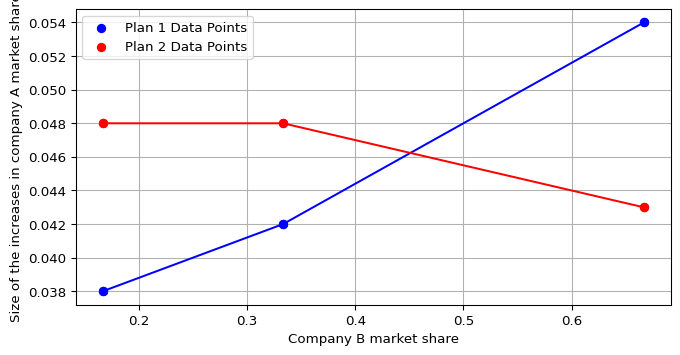

In [7]:
# Summary of results for Markov Chain Problem Part 2:
# Based on the four different initial state vectors I chose and the 3-year timeline
# We may argue that plan 2 is more attractive 
# Because the size of the increases in A's market share under plan 2
# is higher than that of plan 1 under 3 out of the 4 initial state vectors I chose
# My results say that as long as initially, B is NOT particularly dominant in the market 
# Then the increase in A's market share due to plan 2 would be bigger than that of plan 1
# Which argues, in most cases, in favor of plan 2 given the fact that plan 1&2 cost the same

# However, one may argue in favor of plan 1 if B is currently 
# as dominant in the market as in initial state vector (1/6, 2/3, 1/6)
# Since this initial state vector is rather arbitrarily chosen
# this could provoke further interest in the "threshold" that company B's market share has 
# to exceed in order for us to argue in favor of plan 1 instead of plan 2
# Just as given in this project's description for further analysis
# We shall analyze the effect of increasing B's initial market share on the size of the increases 

# With the results at hand, we may create a simple dot plot
# Where we plot the size of the increases against B's market share for both plans

# Data points for Plan 1 
plan1_data_points = [(1/6, 0.038), (1/3, 0.042), (2/3, 0.054)] 
# we use the equal-share, A-dominant, and B-dominant initial state vectors
plan1_x_values, plan1_y_values = zip(*plan1_data_points)

# Data points for Plan 2
plan2_data_points = [(1/6, 0.048), (1/3, 0.048), (2/3, 0.043)]
plan2_x_values, plan2_y_values = zip(*plan2_data_points)

# Create the dot plot and connect the points for Plan 1
plt.figure(figsize=(8, 4))  
plt.scatter(plan1_x_values, plan1_y_values, color='blue', label='Plan 1 Data Points')  
plt.plot(plan1_x_values, plan1_y_values, linestyle='-', marker='o', color='blue')  
plt.scatter(plan2_x_values, plan2_y_values, color='red', label='Plan 2 Data Points')  
plt.plot(plan2_x_values, plan2_y_values, linestyle='-', marker='o', color='red') 
plt.xlabel('Company B market share')  
plt.ylabel('Size of the increases in company A market share')    
plt.legend()  
plt.grid(True)  
plt.show() 

# To decide whether it is worthwhile to gain customers from B (plan 1) or C (plan 2)
# just as suggested by the plot (size of increase due to plan 2 is NOT always above that of plan 1)
# we shall consider how much market share does B occupy initially
# because whether the size of the increase of A's market share due to plan 1 exceeds that of plan 2 
# changes when the initial market share of B exceeds a certain limit/threshold

I really like how you dug into the issue of the threshold for the
initial market share of B. It’s great that you noticed a discrepancy in
the results and thought about how the initial state might affect the
outcome. This is a very insightful analysis that adds depth to your
work.

How do you think the results might change if you looked further into the
future, beyond the 3-year timeline? Would the threshold for the initial
market share of B change if you considered a longer time horizon? Would
the initial state cease to matter at all?

I also appreciate the way you’ve presented your results in a clear and
concise manner. Great work!

Grade: E

In [8]:
# Sports Ranking Part 1. Ranking by Win/Loss Record
# Given series of (i, j) pairs representing game results
E = [(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (3, 1), (7, 2),
                (2, 6), (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2),
                (7, 6), (1, 4), (6, 3)]

# Initialize a dictionary to record the win/loss record for each team
team_stats = defaultdict(lambda: {'wins': 0, 'losses': 0})

for winner, loser in E:
    team_stats[winner]['wins'] += 1
    team_stats[loser]['losses'] += 1

# Rank the teams based on win/loss records
ranked_teams = sorted(team_stats.items(), key=lambda x: (x[1]['wins'], -x[1]['losses']), reverse=True)

# Print the ranked teams
print("Ranking of teams based on win/loss record:")
for rank, (team, stats) in enumerate(ranked_teams, start=1):
    print(f"{rank}. Team {team}: Wins = {stats['wins']}, Losses = {stats['losses']}")

Ranking of teams based on win/loss record:
1. Team 7: Wins = 5, Losses = 1
2. Team 3: Wins = 4, Losses = 2
3. Team 5: Wins = 4, Losses = 2
4. Team 6: Wins = 3, Losses = 3
5. Team 1: Wins = 2, Losses = 4
6. Team 2: Wins = 2, Losses = 4
7. Team 4: Wins = 1, Losses = 5

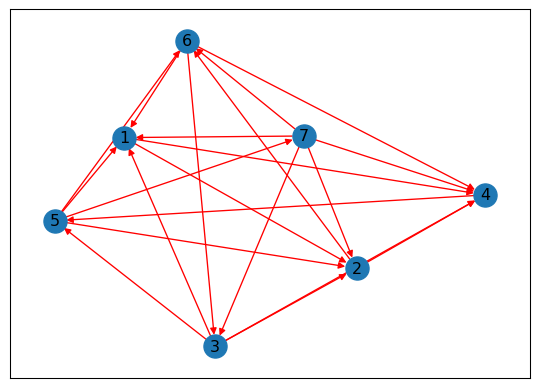

Adjacency matrix:
[[0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0]
 [1 1 0 1 1 0 0]
 [0 0 0 0 1 0 0]
 [1 1 0 0 0 1 1]
 [1 0 1 1 0 0 0]
 [1 1 1 1 0 1 0]]

In [9]:
# Then plot the digraph and give the adjacency matrix 
G = nx.DiGraph()
G.add_node("1")
G.add_node("2")
G.add_node("3")
G.add_node("4")
G.add_node("5")
G.add_node("6")
G.add_node("7")
G.add_edge("1","2")
G.add_edge("7","3")
G.add_edge("2","4")
G.add_edge("4","5")
G.add_edge("3","2")
G.add_edge("5","1")
G.add_edge("6","1")
G.add_edge("3","1")
G.add_edge("7","2")
G.add_edge("2","6")
G.add_edge("3","4")
G.add_edge("7","4")
G.add_edge("5","7")
G.add_edge("6","4")
G.add_edge("3","5")
G.add_edge("5","6")
G.add_edge("7","1")
G.add_edge("5","2")
G.add_edge("7","6")
G.add_edge("1","4")
G.add_edge("6","3")
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows = True)
plt.show()

# Now construct the adjacency matrix 
ijpairs = [(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (3, 1), (7, 2),
         (2, 6), (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2),
         (7, 6), (1, 4), (6, 3)]

# Determine the number of teams
num_teams = max(max(pair) for pair in ijpairs)

# Initialize the adjacency matrix with zeros
adjacency_matrix = np.zeros((num_teams, num_teams), dtype=int)

# Fill in the adjacency matrix based on the pairs
# For instance, (1,2) means the (1,2)th entry of adjacency matrix is 1,
# meanwhile the (2,1)th entry is 0

for i, j in ijpairs:
    adjacency_matrix[i - 1, j - 1] = 1  # Subtract 1 to convert team numbers to array indices

print("Adjacency matrix:")
print(adjacency_matrix)

In [10]:
# Sports Ranking Part 2. Example 2.26 Power Ranking Method

# Find A+A^2
A = adjacency_matrix
A_squared = np.linalg.matrix_power(A, 2)
A_plus_A_squared = A + A_squared

print (A_plus_A_squared)

# Now we may compute the power of each vertex by summing over all entries in the ith row of A+A^2
row_sum_1 = np.sum(A_plus_A_squared[0])
row_sum_2 = np.sum(A_plus_A_squared[1])
row_sum_3 = np.sum(A_plus_A_squared[2])
row_sum_4 = np.sum(A_plus_A_squared[3])
row_sum_5 = np.sum(A_plus_A_squared[4])
row_sum_6 = np.sum(A_plus_A_squared[5])
row_sum_7 = np.sum(A_plus_A_squared[6])

print("Power of vertex 1 is:")
print(row_sum_1)
print("Power of vertex 2 is:")
print(row_sum_2)
print("Power of vertex 3 is:")
print(row_sum_3)
print("Power of vertex 4 is:")
print(row_sum_4)
print("Power of vertex 5 is:")
print(row_sum_5)
print("Power of vertex 6 is:")
print(row_sum_6)
print("Power of vertex 7 is:")
print(row_sum_7)

# When we print the results and rank the 7 teams based on which one has the greatest power
# We get power ranking : team 7 > team 5 > team 3 > team 6 > team 2 > team 1 = team 4

[[0 1 0 2 1 1 0]
 [1 0 1 2 1 1 0]
 [2 3 0 3 2 2 1]
 [1 1 0 0 1 1 1]
 [3 3 2 4 0 3 1]
 [2 2 1 3 2 0 0]
 [3 3 2 5 2 2 0]]
Power of vertex 1 is:
5
Power of vertex 2 is:
6
Power of vertex 3 is:
13
Power of vertex 4 is:
5
Power of vertex 5 is:
16
Power of vertex 6 is:
10
Power of vertex 7 is:
17

In [11]:
# Sports Ranking Part 3. Example 2.47 Reverse PageRank Method

# As in example 2.47, write out the page ranking transition matrix P = (A^T)^TD
# By Theorem 2.7, D is a diagonal matrix whose ith entry is 1/(sum of all entries in the ith row of A)
D = np.array([[1/2, 0, 0, 0, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/4, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1/4, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 0, 0, 0, 0, 1/5]])
P = A @ D
# Select teleportation vector v
v = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7])
# Choose teleportation parameter alpha as in example 2.47
alpha = 0.85
# Use the reverse PageRank method to solve for x 
x = (1-alpha)*np.linalg.inv((np.eye(7) - alpha*P))@v
print(x)

# This rank suggests team 7 > team 3 > team 5 > team 6 > team 1 > team 2 > team 4

[0.14823866 0.1450318  0.26648395 0.07667243 0.25997111 0.20622941
 0.32629959]

In [12]:
# Sports Ranking Part 4. Power Ranking Weighted by Game Margins

# Create a weighted digraph based on additional information M
edges = [("1","2", 4),
         ("7","3", 8),
         ("2","4", 7),
         ("4","5", 3),
         ("3","2", 7),
         ("5","1", 7),
         ("6","1", 23),
         ("3","1", 15),
         ("7","2", 6),
         ("2","6", 18),
         ("3","4", 13),
         ("7","4", 14),
         ("5","7", 7),
         ("6","4", 13),
         ("3","5", 7),
         ("5","6", 18),
         ("7","1", 45),
         ("5","2", 10),
         ("7","6", 19),
         ("1","4", 14),
         ("6","3", 13),
        ]
G = nx.DiGraph()
for source, target, strength in edges:
    G.add_edge(source, target, strength = strength)
gv.d3(G, show_edge_label = True, edge_label_data_source = 'strength')

Details for selected element
 
 
 
 
 
 

 
 
 <!-- Menu: General -->
 
 General
 
 
 <!-- Sub-menu: State -->
 
 
 App state
 
 
 Reset 
 
 
 <!-- Sub-menu: Display mode (fullscreen or not) -->
 
 
 Display mode
 
 
 Enter full screen 
 
 
 <!-- Sub-menu: Export -->
 
 
 Export
 
 
 SVG 
 PNG 
 JPG 
 
 
 
 <!-- Menu: Data -->
 
 Data selection
 
 
 <!-- Sub-menu: Graph (only shown if multiple graphs in data) -->
 
 
 Graph
 
 
 
 
 
 <!-- Sub-menu: Node label text -->
 
 
 Node label text
 
 
 
 
 
 <!-- Sub-menu: Edge label text -->
 
 
 Edge label text
 
 
 
 
 
 <!-- Sub-menu: Node size -->
 
 Node size
 
 
 
 
 
 
 
 Normalize 
 
 
 
 Minimum 
 
 
 
 
 Maximum 
 
 
 
 
 
 <!-- Sub-menu: Edge size -->
 
 Edge size
 
 
 
 
 
 
 
 Normalize 
 
 
 
 Minimum 
 
 
 
 
 Maximum 
 
 
 
 
 
 
 <!-- Menu: Nodes -->
 
 Nodes
 
 
 <!-- Sub-menu: Visibility -->
 
 
 Visibility
 
 
 
 
 Show nodes 
 
 
 
 <!-- Sub-menu: Size -->
 
 
 Size
 
 
 
 Scaling factor 
 
 
 
 
 
 <!-- Sub-menu: Position -->
 
 
 Position
 
 
 Release fixed nodes 
 
 
 <!-- Sub-menu: Drag behavior -->
 
 
 Drag behavior
 
 
 
 
 Fix node position 
 
 
 
 <!-- Sub-menu: Hover behavior -->
 
 
 Hover behavior
 
 
 
 
 Show neighborhood 
 
 
 
 Show tooltips (if provided) 
 
 
 
 
 <!-- Menu: Node images -->
 
 
 Node images
 
 
 <!-- Sub-menu: Visibility -->
 
 
 Visibility
 
 
 
 
 Show node images 
 
 
 
 <!-- Sub-menu: Size -->
 
 
 Size
 
 
 Scaling factor 
 
 
 
 
 
 
 <!-- Menu: Node labels -->
 
 Node labels
 
 
 <!-- Sub-menu: Visibility -->
 
 
 Visibility
 
 
 
 
 Show node labels 
 
 
 
 Show borders 
 
 
 
 <!-- Sub-menu: Size -->
 
 
 Size
 
 
 Scaling factor 
 
 
 
 
 <!-- Sub-menu: Rotation -->
 
 
 Rotation
 
 
 Angle 
 
 
 
 
 
 <!-- Menu: Edges -->
 
 Edges
 
 
 <!-- Sub-menu: Visibility -->
 
 
 Visibility
 
 
 
 
 Show edges 
 
 
 
 <!-- Sub-menu: Size -->
 
 
 Size
 
 
 Scaling factor 
 
 
 
 
 <!-- Sub-menu: Form -->
 
 
 Form
 
 
 Curvature 
 
 
 
 
 <!-- Sub-menu: Hover behavior -->
 
 
 Hover behavior
 
 
 
 
 Show tooltips (if provided) 
 
 
 
 
 <!-- Menu: Edge labels -->
 
 Edge labels
 
 
 <!-- Sub-menu: Visibility -->
 
 
 Visibility
 
 
 
 
 Show edge labels 
 
 
 
 Show borders 
 
 
 
 <!-- Sub-menu: Size -->
 
 
 Size
 
 
 Scaling factor 
 
 
 
 
 <!-- Sub-menu: Rotation -->
 
 
 Rotation
 
 
 Angle 
 
 
 
 
 
 <!-- Menu: Layout algorithm -->
 
 Layout algorithm
 
 

 <!-- Sub-menu: Simulation -->
 
 
 Simulation
 
 
 
 
 Active 
 
 
 
 <!-- Sub-menu: Many-body force -->
 
 
 Many-body force
 
 
 
 
 On 
 
 
 
 Strength 
 
 
 
 
 Theta 
 
 
 
 
 
 
 Use minimum distance 
 
 
 Min 
 
 
 
 
 
 
 
 Use maximum distance 
 
 
 Max 
 
 
 
 
 
 
 
 <!-- Sub-menu: Links force -->
 
 
 Links force
 
 
 
 
 On 
 
 
 
 
 Distance 
 
 
 
 
 Strength 
 
 
 
 
 
 
 <!-- Sub-menu: Collision force -->
 
 
 Collision force
 
 
 
 
 On 
 
 
 
 Radius 
 
 
 
 
 Strength 
 
 
 
 
 
 
 <!-- Sub-menu: x-positioning force -->
 
 
 x-positioning force
 
 
 
 
 On 
 
 
 
 Strength 
 
 
 
 
 
 
 <!-- Sub-menu: y-positioning force -->
 
 
 y-positioning force
 
 
 
 
 On 
 
 
 
 Strength 
 
 
 
 
 
 
 <!-- Sub-menu: Centering force -->
 
 
 Centering force
 
 
 
 
 On

It turns out to be pretty easy to get the weighted adjacency matrix from
the weighted digraph above. Just needs a little bit of tweaking to get
it into the same order you have the teams in. (Also, I added “todense”
so that it doesn’t come out as a sparse matrix.)

``` python
nx.adjacency_matrix(G,weight='strength',nodelist=[str(i) for i in range(1, 8)]).todense()
```

    array([[ 0,  4,  0, 14,  0,  0,  0],
           [ 0,  0,  0,  7,  0, 18,  0],
           [15,  7,  0, 13,  7,  0,  0],
           [ 0,  0,  0,  0,  3,  0,  0],
           [ 7, 10,  0,  0,  0, 18,  7],
           [23,  0, 13, 13,  0,  0,  0],
           [45,  6,  8, 14,  0, 19,  0]])

In [14]:
# Now construct the "weighted" adjacency matrix 
ijpairs = [(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (3, 1), (7, 2),
         (2, 6), (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2),
         (7, 6), (1, 4), (6, 3)]
margins = [4, 8, 7, 3, 7, 7, 23, 15, 6, 18, 13, 14, 7, 13, 7, 18, 45, 10, 19, 14, 13]

# Determine the number of teams
num_teams = max(max(pair) for pair in ijpairs)

# Initialize the weighted adjacency matrix with zeros
weighted_adjacency_matrix = np.zeros((num_teams, num_teams), dtype=int)

# Fill in the weighted adjacency matrix based on pairs and margins
for pair, margin in zip(ijpairs, margins):
    i, j = pair
    weighted_adjacency_matrix[i - 1, j - 1] = margin  # Subtract 1 to convert team numbers to array indices

# Let B denote this "weighted" adjacency matrix
B = weighted_adjacency_matrix
print("The weighted adjacency matrix B is therefore given by: ")
print(B)

# We then do the 'power ranking' again with B
# Find B+B^2
B_squared = np.linalg.matrix_power(B, 2)
B_plus_B_squared = B + B_squared


# Now we may compute the power of each vertex by summing over all entries in the ith row of A+A^2
row_sum_1_weighted = np.sum(B_plus_B_squared[0])
row_sum_2_weighted = np.sum(B_plus_B_squared[1])
row_sum_3_weighted = np.sum(B_plus_B_squared[2])
row_sum_4_weighted = np.sum(B_plus_B_squared[3])
row_sum_5_weighted = np.sum(B_plus_B_squared[4])
row_sum_6_weighted = np.sum(B_plus_B_squared[5])
row_sum_7_weighted = np.sum(B_plus_B_squared[6])

print("Power of vertex 1 is:")
print(row_sum_1_weighted)
print("Power of vertex 2 is:")
print(row_sum_2_weighted)
print("Power of vertex 3 is:")
print(row_sum_3_weighted)
print("Power of vertex 4 is:")
print(row_sum_4_weighted)
print("Power of vertex 5 is:")
print(row_sum_5_weighted)
print("Power of vertex 6 is:")
print(row_sum_6_weighted)
print("Power of vertex 7 is:")
print(row_sum_7_weighted)

# Therefore, we end up with the following "weighted" ranking:
# team 7 > team 5 > team 6 > team 2 > team 3 > team 1 > team 4

The weighted adjacency matrix B is therefore given by: 
[[ 0  4  0 14  0  0  0]
 [ 0  0  0  7  0 18  0]
 [15  7  0 13  7  0  0]
 [ 0  0  0  0  3  0  0]
 [ 7 10  0  0  0 18  7]
 [23  0 13 13  0  0  0]
 [45  6  8 14  0 19  0]]
Power of vertex 1 is:
160
Power of vertex 2 is:
928
Power of vertex 3 is:
820
Power of vertex 4 is:
129
Power of vertex 5 is:
1944
Power of vertex 6 is:
1048
Power of vertex 7 is:
2361

I think that these results are correct. I’d like to see a bit more
discussion about the implications of these results. For example, what do
the rankings tell us about the teams? How can you explain in English why
the rankings change from one method to the next? Which method do you
think is best?

Grade: M